In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("kyphosis.csv")

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [5]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [7]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


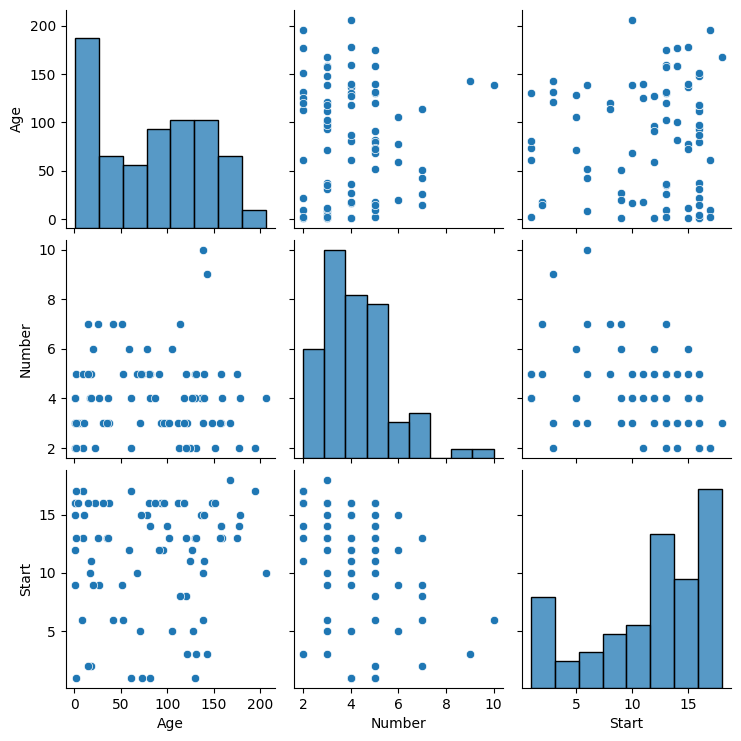

In [8]:
sns.pairplot(df)

<Axes: xlabel='Kyphosis', ylabel='count'>

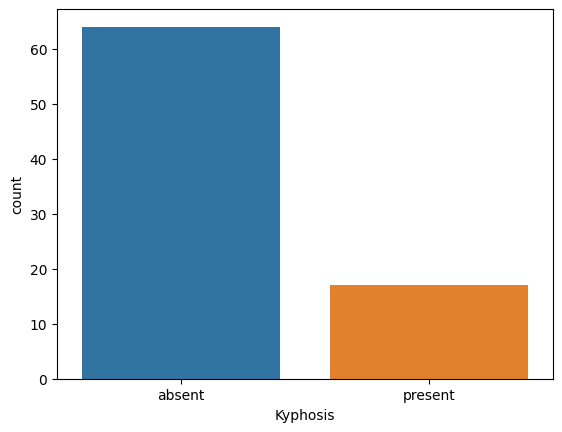

In [9]:
sns.countplot(x= df["Kyphosis"] )

<Axes: xlabel='Kyphosis', ylabel='count'>

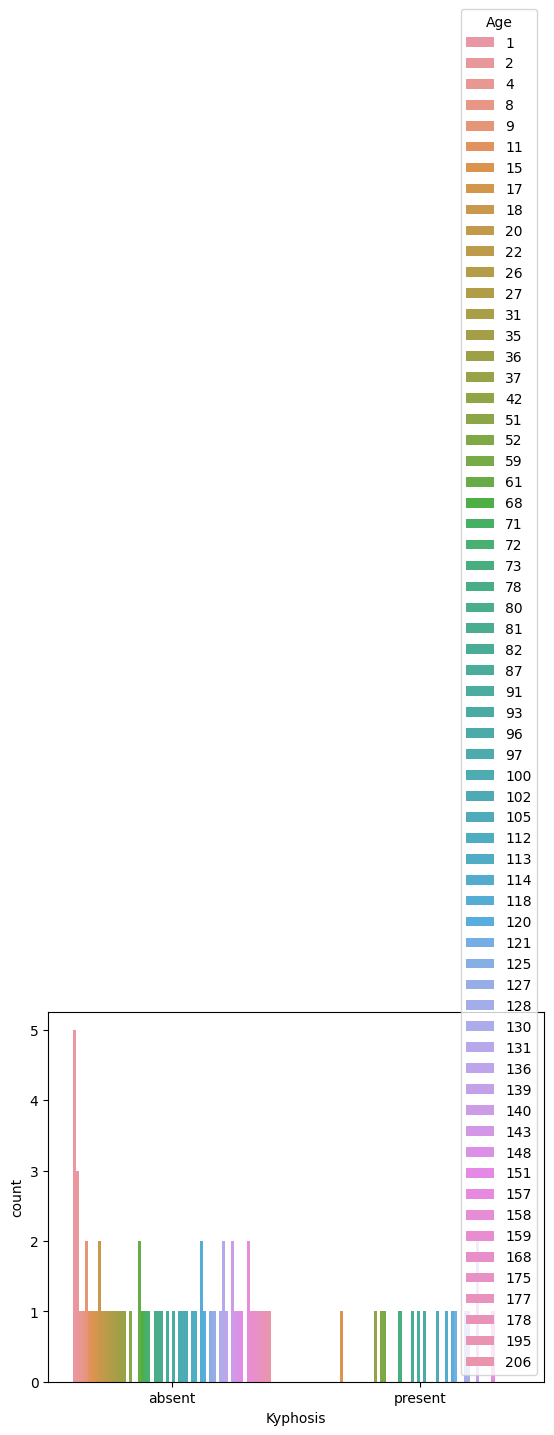

In [10]:
sns.countplot(x= df["Kyphosis"], hue= df["Age"])

<Axes: xlabel='Age', ylabel='count'>

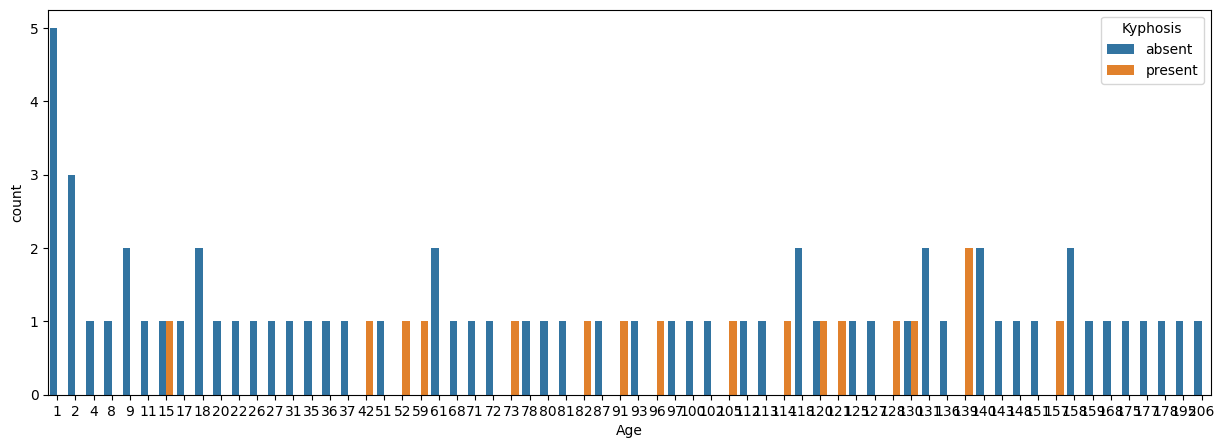

In [11]:
plt.figure(figsize= (15, 5))
sns.countplot(x= df["Age"], hue= df["Kyphosis"])

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


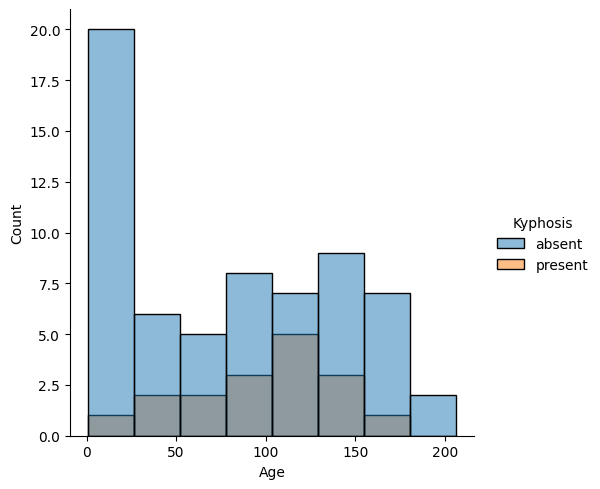

In [12]:
sns.displot(x= df['Age'], hue= df['Kyphosis'])

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


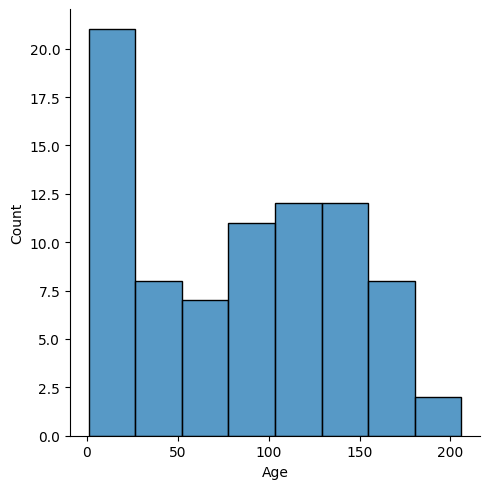

In [13]:
sns.displot(x= df["Age"])

In [14]:
present = df[df["Kyphosis"] == "present"]

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


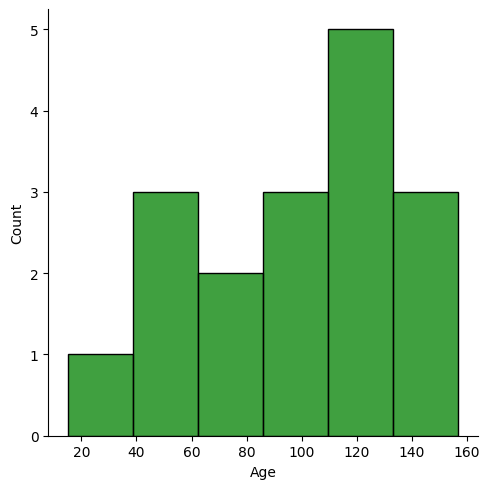

In [15]:
sns.displot(x= present["Age"], color= "g")

In [16]:
absent = df[df["Kyphosis"] == "absent"]

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


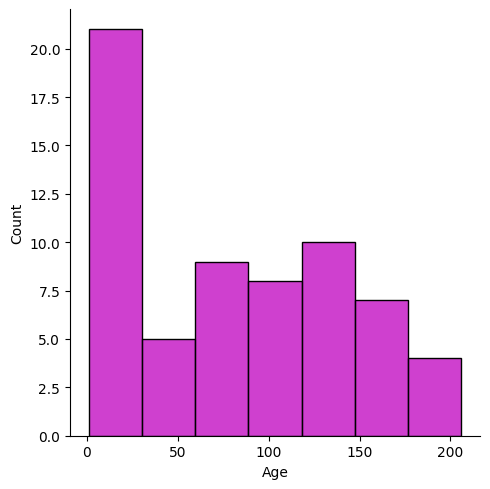

In [17]:
sns.displot(x= absent["Age"], bins= 7, color= "m")

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


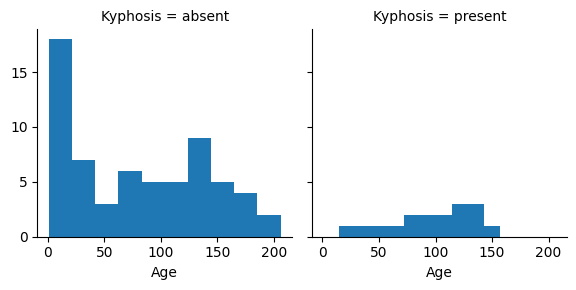

In [18]:
g = sns.FacetGrid(data= df, col= "Kyphosis")
g.map(plt.hist, "Age")

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop("Kyphosis", axis= 1)
y = df["Kyphosis"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
DT = DecisionTreeClassifier()

In [24]:
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
Prediction = DT.predict(X_test)

In [26]:
Prediction

array(['absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'present',
       'present', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'present'], dtype=object)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print(classification_report(y_test, Prediction))

              precision    recall  f1-score   support

      absent       0.83      0.83      0.83        18
     present       0.57      0.57      0.57         7

    accuracy                           0.76        25
   macro avg       0.70      0.70      0.70        25
weighted avg       0.76      0.76      0.76        25



In [29]:
print(confusion_matrix(y_test, Prediction))

[[15  3]
 [ 3  4]]


In [30]:
len(y_test)

25

In [31]:
sum(y_test == "absent")

18

In [32]:
sum(y_test == "present")

7

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc = RandomForestClassifier(n_estimators = 100)

In [35]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
rfc_predict = rfc.predict(X_test)

In [37]:
rfc_predict

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'present'], dtype=object)

In [38]:
print(confusion_matrix(y_test, rfc_predict))

[[17  1]
 [ 5  2]]


In [39]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

      absent       0.77      0.94      0.85        18
     present       0.67      0.29      0.40         7

    accuracy                           0.76        25
   macro avg       0.72      0.62      0.62        25
weighted avg       0.74      0.76      0.72        25



In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
LR = LogisticRegression()

In [42]:
LR.fit(X_train, y_train)

LogisticRegression()

In [43]:
LR_predict = LR.predict(X_test)

In [44]:
LR_predict

array(['absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent'], dtype=object)

In [45]:
print(confusion_matrix(y_test, LR_predict))

[[17  1]
 [ 5  2]]


In [46]:
print(classification_report(y_test, LR_predict))

              precision    recall  f1-score   support

      absent       0.77      0.94      0.85        18
     present       0.67      0.29      0.40         7

    accuracy                           0.76        25
   macro avg       0.72      0.62      0.62        25
weighted avg       0.74      0.76      0.72        25

